# Mushrooms

## Dataset
This data set (https://www.kaggle.com/datasets/uciml/mushroom-classification/data) includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.  This latter class was combined with the poisonous one.  The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

## 1. Import libraries for EDA & preprocessing

In [120]:
# Regular EDA and plotting libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

## 2. Load the data

In [121]:
# Load the data
df = pd.read_csv("mushrooms.csv") 
df.shape # (8124, 23)

(8124, 23)

## 3. Exploratory data analysis

In [122]:
# Check the dataset

df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m


In [123]:
# check the descriptive stats of vars
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [124]:
# Check how many poisonous (p) and edible (e) samples for the target variable (class)
print(df['class'].value_counts())
print(df['class'].value_counts(normalize=True))

class
e    4208
p    3916
Name: count, dtype: int64
class
e    0.517971
p    0.482029
Name: proportion, dtype: float64


- Since these two values are close to even, our target column, class, can be considered balanced.

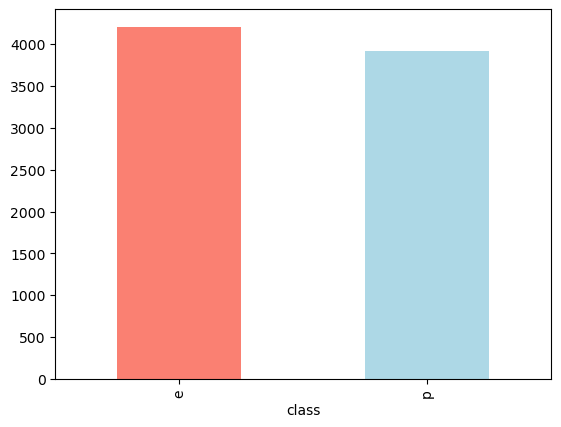

In [125]:
# Plot the value counts with a bar graph
df['class'].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [126]:
# check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [127]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

- There are no missing values and all of our columns are string in nature.

In [128]:
# Get unique values from each column, so we know which values to convert to numerical
for col in df.columns:
    print(col,df[col].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [129]:
# Change dtype of vars to category
df = df.astype('category')

In [130]:
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [131]:
# create an instance of LabelEncoder()
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
for column in df.columns:
    df[column]=le.fit_transform(df[column])
    if column == 'class':
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(le_name_mapping)

{'e': 0, 'p': 1}


- Fromt the above cell, now we know that 1 indicates poisonous mushrooms, and 0 indicates edible mushrooms. 

In [132]:
pd.set_option('display.max_columns',None)

In [133]:
df.head(15)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,0,2,2,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,0,2,2,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,0,3,2,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,0,2,2,2,7,7,0,2,1,4,2,3,3


In [134]:
# check the variable, veil-type & gill-attachment
df["gill-attachment"].value_counts() 
df["veil-type"].value_counts() 

veil-type
0    8124
Name: count, dtype: int64

- Given the dataset preview, it seemed that 'gill_attachment" had only 1s, and "veil-type" had only 0s, so their values were checked, and "veil-type" only had 1 category (0) as checked above, so this variable was dropped from the dataframe (see below).

In [135]:
# drop the veil-type var.
df=df.drop(["veil-type"],axis=1)

In [136]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [137]:
# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [138]:
# Find the correlation between our independent variables
corr_matrix = df_scaled.corr()
corr_matrix 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,-0.102019,-0.379361,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,0.030191,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,-0.126245,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,0.321274,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,0.244188,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,-0.205215,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,0.144063,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,0.350548,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,-0.344345,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,0.315080,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


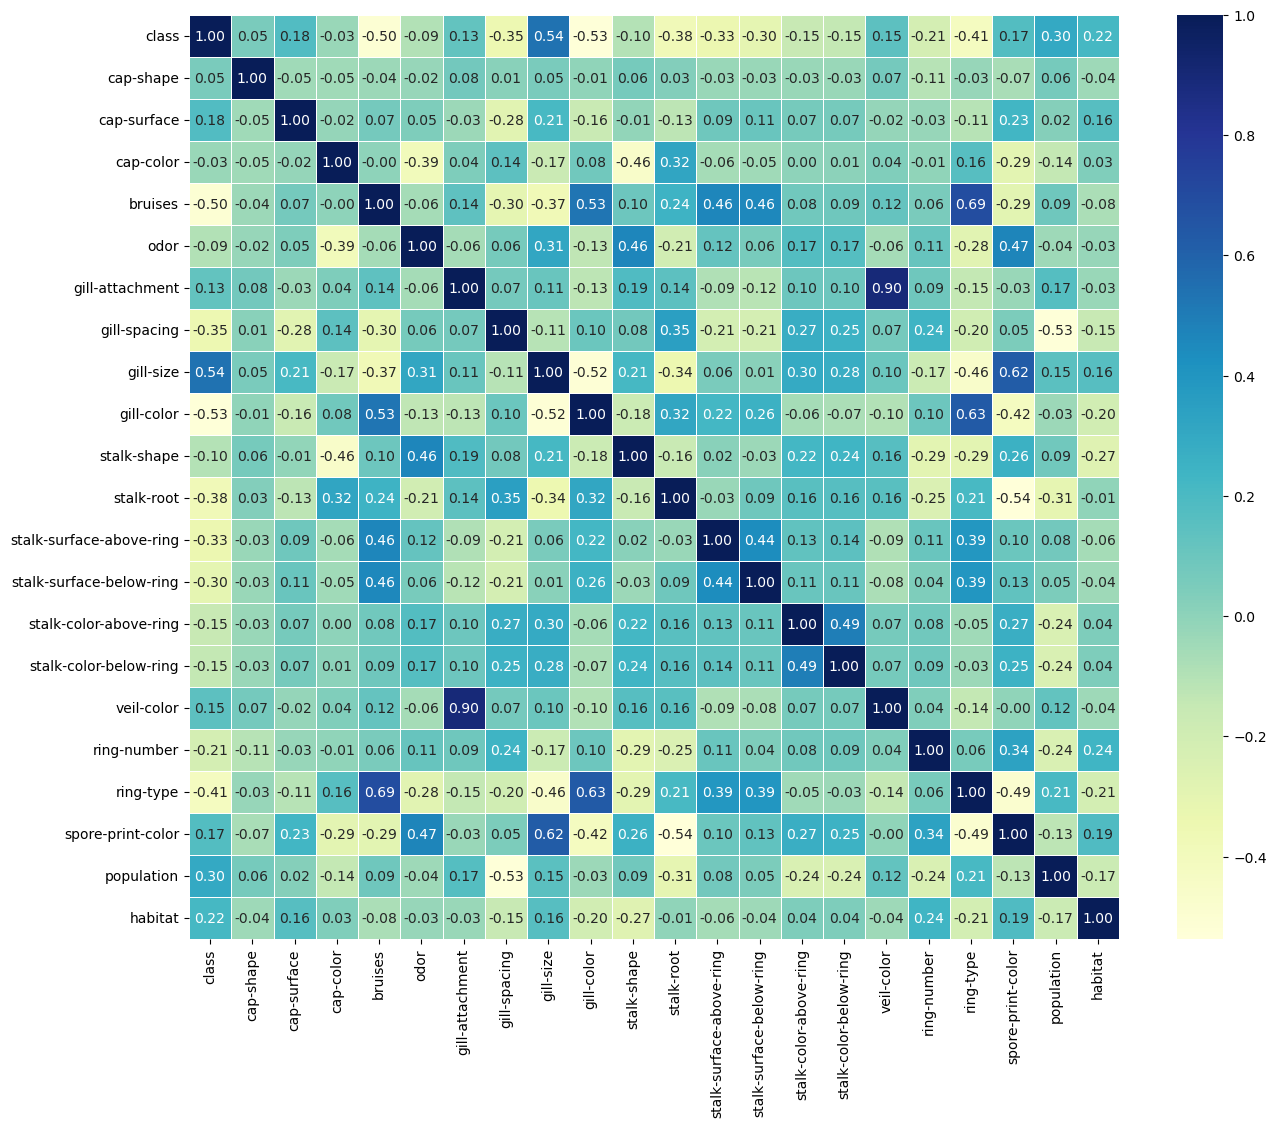

In [139]:
# heatmap for correlation (with scaled data)
corr_matrix = df_scaled.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

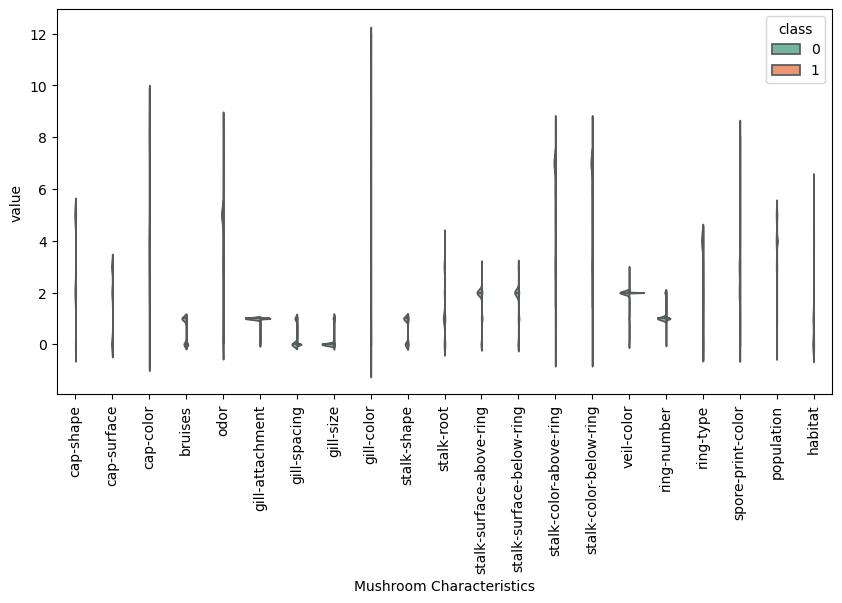

In [140]:
# violin plot for the distribution of the classification mushroom characteristics.
df_div = pd.melt(df, "class", var_name="Mushroom Characteristics")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax = ax, x="Mushroom Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set2')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

- Given the correlation matrix, corr heatmaps, and the violin plot, it seems like "bruises", "gill-size", and "gill-color" seem to be highly related to the class, the target feature. Therefore, below take a look at the crosstab between the class (target feature) and these three variables (bruises, gill-sie, & gill-color).

In [141]:
# compare class with bruises
pd.crosstab(df["class"],df["bruises"])

bruises,0,1
class,,
0,1456,2752
1,3292,624


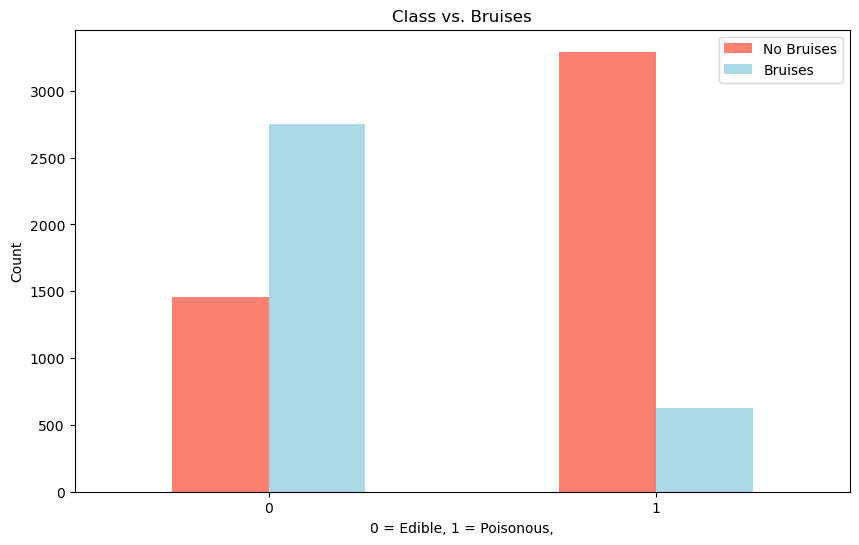

In [142]:
# Create a plot for class vs. bruises
pd.crosstab(df["class"],df["bruises"]).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

# Add some attributes to it
plt.title("Class vs. Bruises")
plt.xlabel("0 = Edible, 1 = Poisonous,")
plt.ylabel("Count")
plt.legend(["No Bruises", "Bruises"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

In [143]:
# compare class with bruises
pd.crosstab(df["class"],df["gill-size"])

gill-size,0,1
class,,
0,3920,288
1,1692,2224


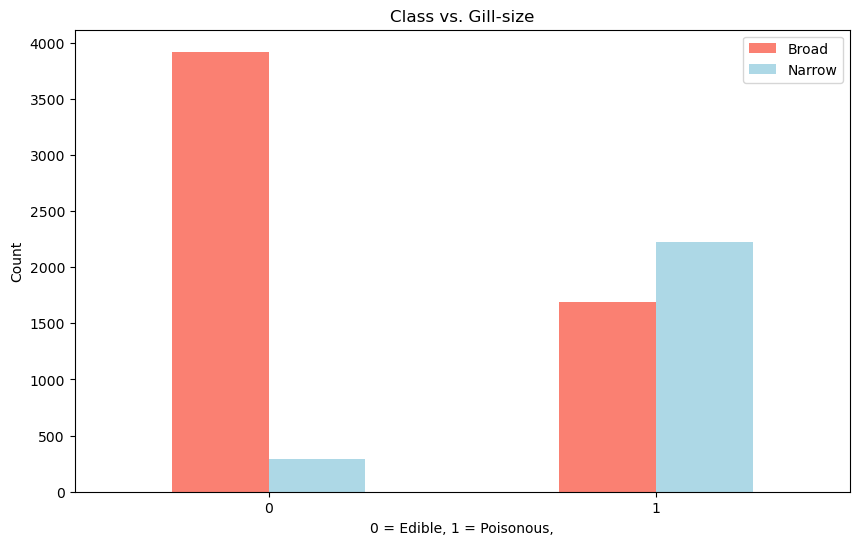

In [144]:
# Create a plot for class vs. gill-size
pd.crosstab(df["class"],df["gill-size"]).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

# Add some attributes to it
plt.title("Class vs. Gill-size")
plt.xlabel("0 = Edible, 1 = Poisonous,")
plt.ylabel("Count")
plt.legend(["Broad", "Narrow"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

In [145]:
# compare class with gill-color
pd.crosstab(df["class"],df["gill-color"])

gill-color,0,1,2,3,4,5,6,7,8,9,10,11
class,,,,,,,,,,,,
0,0,96,248,204,344,936,64,852,0,444,956,64
1,1728,0,504,528,64,112,0,640,24,48,246,22


In [146]:
import warnings
warnings.filterwarnings('ignore')

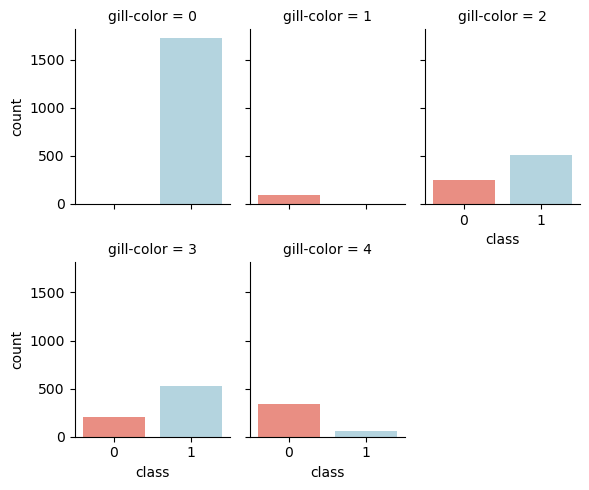

In [147]:
# Given the violin plot above, 
# it seems like 4 is the number where class splits between poisonous vs. edible, 
# so the two sets of plots were created above and below the gill-color=4.
# plot for class vs. gill-color <= 4
new_var = df[['class', 'gill-color']]
new_var = new_var[new_var['gill-color'] <= 4]
sns.catplot(x='class', col='gill-color', data=new_var, kind='count', height=2.5, aspect=.8, col_wrap=3, palette=['salmon', 'lightblue'])
plt.show()

## 4. Modeling 

Given the characteristics of the mushroom, We're aiming to reach 85% accuracy at predicting whether or not the mushroom is edible.

In [148]:
df.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1


In [149]:
# Feature variables -- Everything except target variable
X = df.drop("class", axis=1)

# Target variable -- class
y = df["class"].values

In [150]:
# Independent variables (no target column)
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


In [151]:
# check the targets
y[:14]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [152]:
from sklearn.model_selection import train_test_split, cross_val_score

# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2) # % of data to use for test set

In [153]:
# chck the train data set
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7873,3,2,2,0,7,1,0,1,0,1,0,2,1,6,7,2,1,0,7,4,0
6515,5,2,4,0,2,1,0,1,0,1,0,1,2,7,7,2,1,0,7,4,4
6141,2,3,2,0,8,1,0,1,0,1,0,2,2,6,7,2,1,0,7,4,2
2764,2,0,4,1,5,1,0,0,9,1,1,2,2,3,6,2,1,4,3,4,0
438,0,3,9,1,3,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,3


In [154]:
y_train, len(y_train) # 6499 is the 80% of the total data 8124

(array([1, 1, 1, ..., 0, 1, 0]), 6499)

In [155]:
# check the test data set
X_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1971,2,0,4,0,5,1,1,0,3,1,3,2,0,7,7,2,1,0,3,3,1
6654,2,2,2,0,8,1,0,1,0,1,0,2,2,6,6,2,1,0,7,4,2
5606,5,3,4,0,2,1,0,1,0,1,0,1,2,7,6,2,1,0,7,4,2
3332,2,3,3,1,5,1,0,0,5,1,1,2,2,3,6,2,1,4,3,5,0
6988,2,2,2,0,7,1,0,1,0,1,0,2,2,6,6,2,1,0,7,4,2


In [156]:
y_test, len(y_test) # 1625 is the 20% of the total data 8124

(array([0, 1, 1, ..., 1, 1, 1]), 1625)

### 4-1. Model choices
We'll be using the following models and comparing their results.
- Logistic Regression with LogisticRegression()
- K-NEarest Neighbors with KNeighboursClassifier()
- RandomForest - RandomForestClassifier()

In [157]:
## Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [158]:
# create functions for moel fitting & evaluation metrics
def model_predictions(model, X_train, X_test, y_train, y_test, df, model_name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    df, model_confusion = performance_metrics_recorder(predictions, y_test, df, model_name)

    return (model, df, model_confusion)

def performance_metrics_recorder(predictions, y_test, df, model_name):
  
    model_accuracy_score = accuracy_score(y_test, predictions)
    model_precision_score = precision_score(y_test, predictions)
    model_recall_score = recall_score(y_test, predictions)
    model_f1_score = f1_score(y_test, predictions)
    model_roc_auc = roc_auc_score(y_test, predictions)
    model_confusion = confusion_matrix(y_test, predictions)

    df.loc[len(df)] = [model_name,model_accuracy_score,model_precision_score,model_recall_score,model_f1_score,model_roc_auc]

    return(df, model_confusion)

def feature_importance_visualizer(X, model, label, color=None, grid=None):

    features_list = X.columns.values
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)

    plt.figure()
    plt.barh(range(len(sorted_idx)),feature_importance[sorted_idx], align='center', color=color)
    plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
    plt.xlabel('Importance')
    plt.title("Feature Importances According to " + label + " Classifier")
    if grid is True:
        plt.grid(alpha=0.5)
    plt.show()

def feature_importance_visualizer_for_nonstandards(X, model, label, color, grid=None):
    try:
        importance = model.coef_[0]
    except:
        importance = model.coef_

    feature_importances = pd.DataFrame({
        'feature':X.columns.to_list(), 
        'importance':importance.tolist()
    }).sort_values('importance',ascending=True)

    plt.barh(feature_importances['feature'],feature_importances['importance'], align='center', color=color)
    plt.xlabel('Importance')
    plt.title("Feature Importances According to " + label + " Classifier")
    if grid is True:
        plt.grid(alpha=0.5)
    plt.show()

In [159]:
# defining some empty dfs to record metrics from each model and stage of analysis
column_names = ["method","accuracy","precision","recall","f1","roc_auc"]
performance_metrics = pd.DataFrame(columns=column_names)

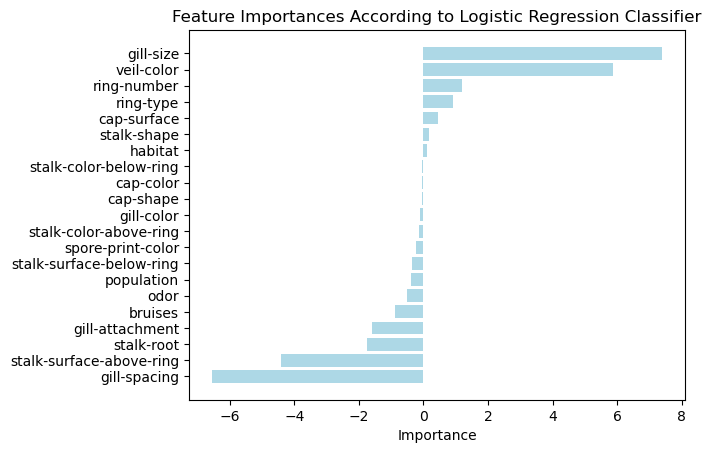

In [160]:
# Logistic Regression
label = "Logistic Regression"
lr = LogisticRegression()
lr, performance_metrics, lr_confusion = model_predictions(lr, X_train, X_test, y_train, y_test, performance_metrics, label)
feature_importance_visualizer_for_nonstandards(X, lr, label, color="lightblue");

In [161]:
# K Neighbours
label = "KNN"
knn = KNeighborsClassifier()
knn, performance_metrics, knn_confusion = model_predictions(knn, X_train, X_test, y_train, y_test, performance_metrics, label)
# feature importance function not defined for KNN algorithm

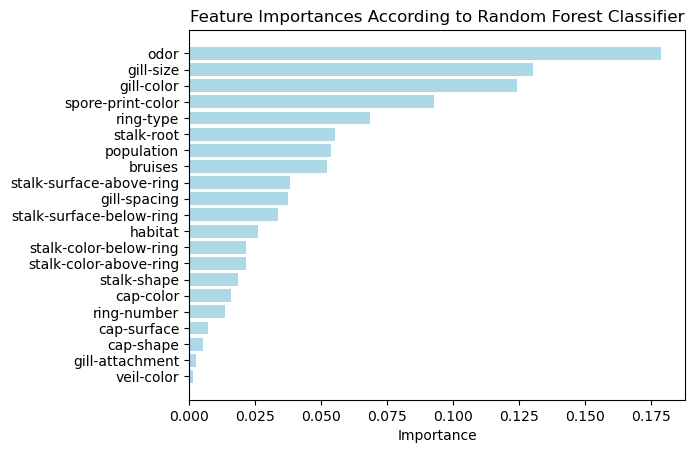

In [162]:
# Random Forest
label = "Random Forest"
rf = RandomForestClassifier(random_state=42)
rf, performance_metrics, rf_confusion = model_predictions(rf, X_train, X_test, y_train, y_test, performance_metrics, label)
feature_importance_visualizer(X, rf, label, color="lightblue")

In [163]:
# examining metrics dataframe
performance_metrics

,method,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.947077,0.942748,0.94757,0.945153,0.947095
1,KNN,0.996308,0.992386,1.00000,0.996178,0.996441
2,Random Forest,1.000000,1.000000,1.00000,1.000000,1.000000


- Given model_scores, especially, Random Forest estimator score, models seem to overfit the data. Model tuning seems to be necessary to prevent overfitting.

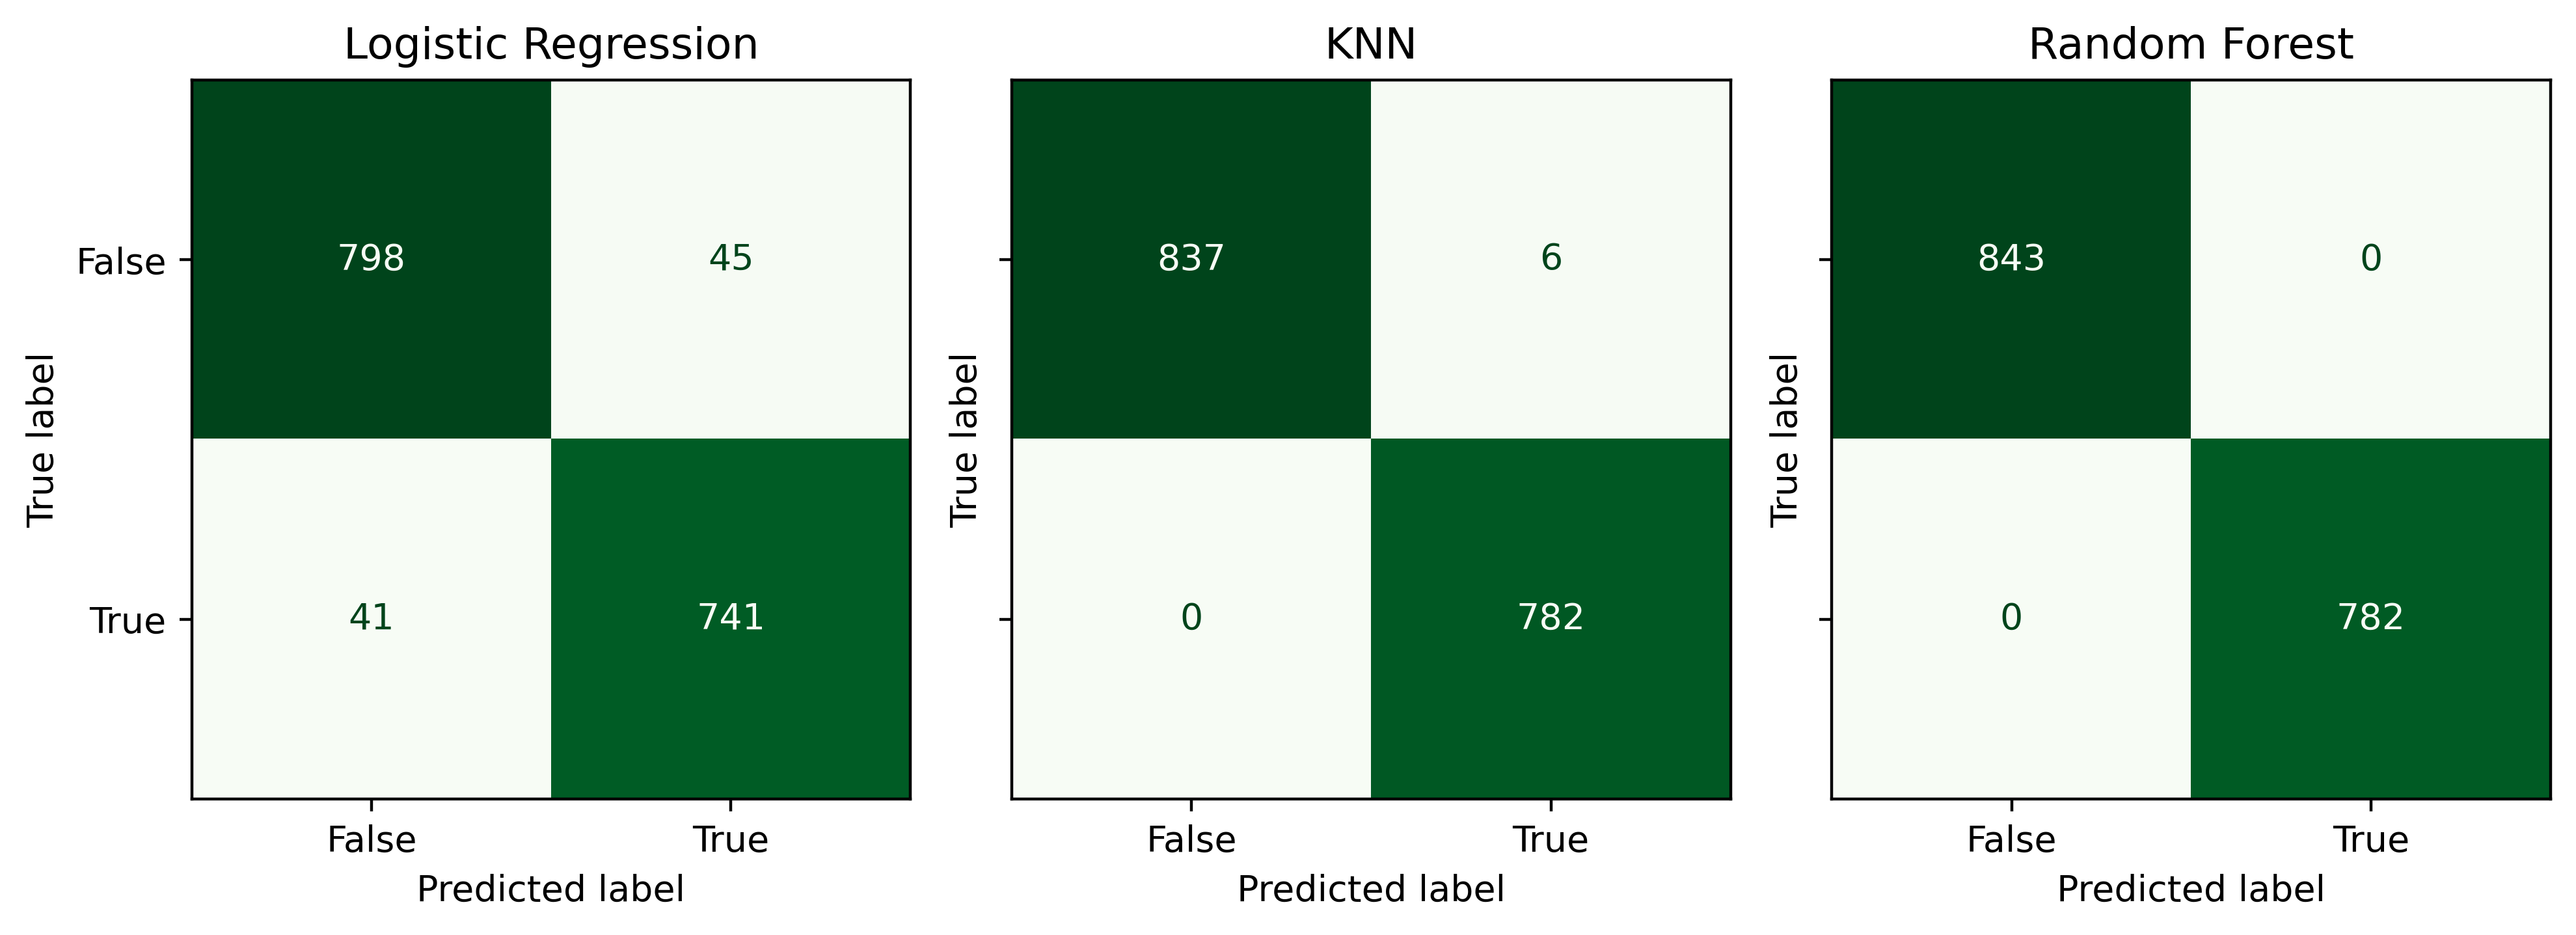

In [164]:
# comparing confusion matrices for this stage of analysis
x_labels = performance_metrics['method']
indices = np.arange(len(x_labels))

fig, ax = plt.subplots(1,3,sharex=True, sharey=True, dpi=400, figsize=(10,10))

# first row
ax[0].set_title(x_labels[0])
ax[1].set_title(x_labels[1])
ax[2].set_title(x_labels[2])



ConfusionMatrixDisplay(lr_confusion,display_labels=[False,True]).plot(ax=ax[0],cmap='Greens',colorbar=False)
ConfusionMatrixDisplay(knn_confusion,display_labels=[False,True]).plot(ax=ax[1],cmap='Greens',colorbar=False)
ConfusionMatrixDisplay(rf_confusion,display_labels=[False,True]).plot(ax=ax[2],cmap='Greens',colorbar=False)

# # Add a single shared colorbar
# cbar = fig.colorbar(ax[2].collections[0], ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
# cbar.set_label('Counts')

plt.tight_layout()

fig.show()

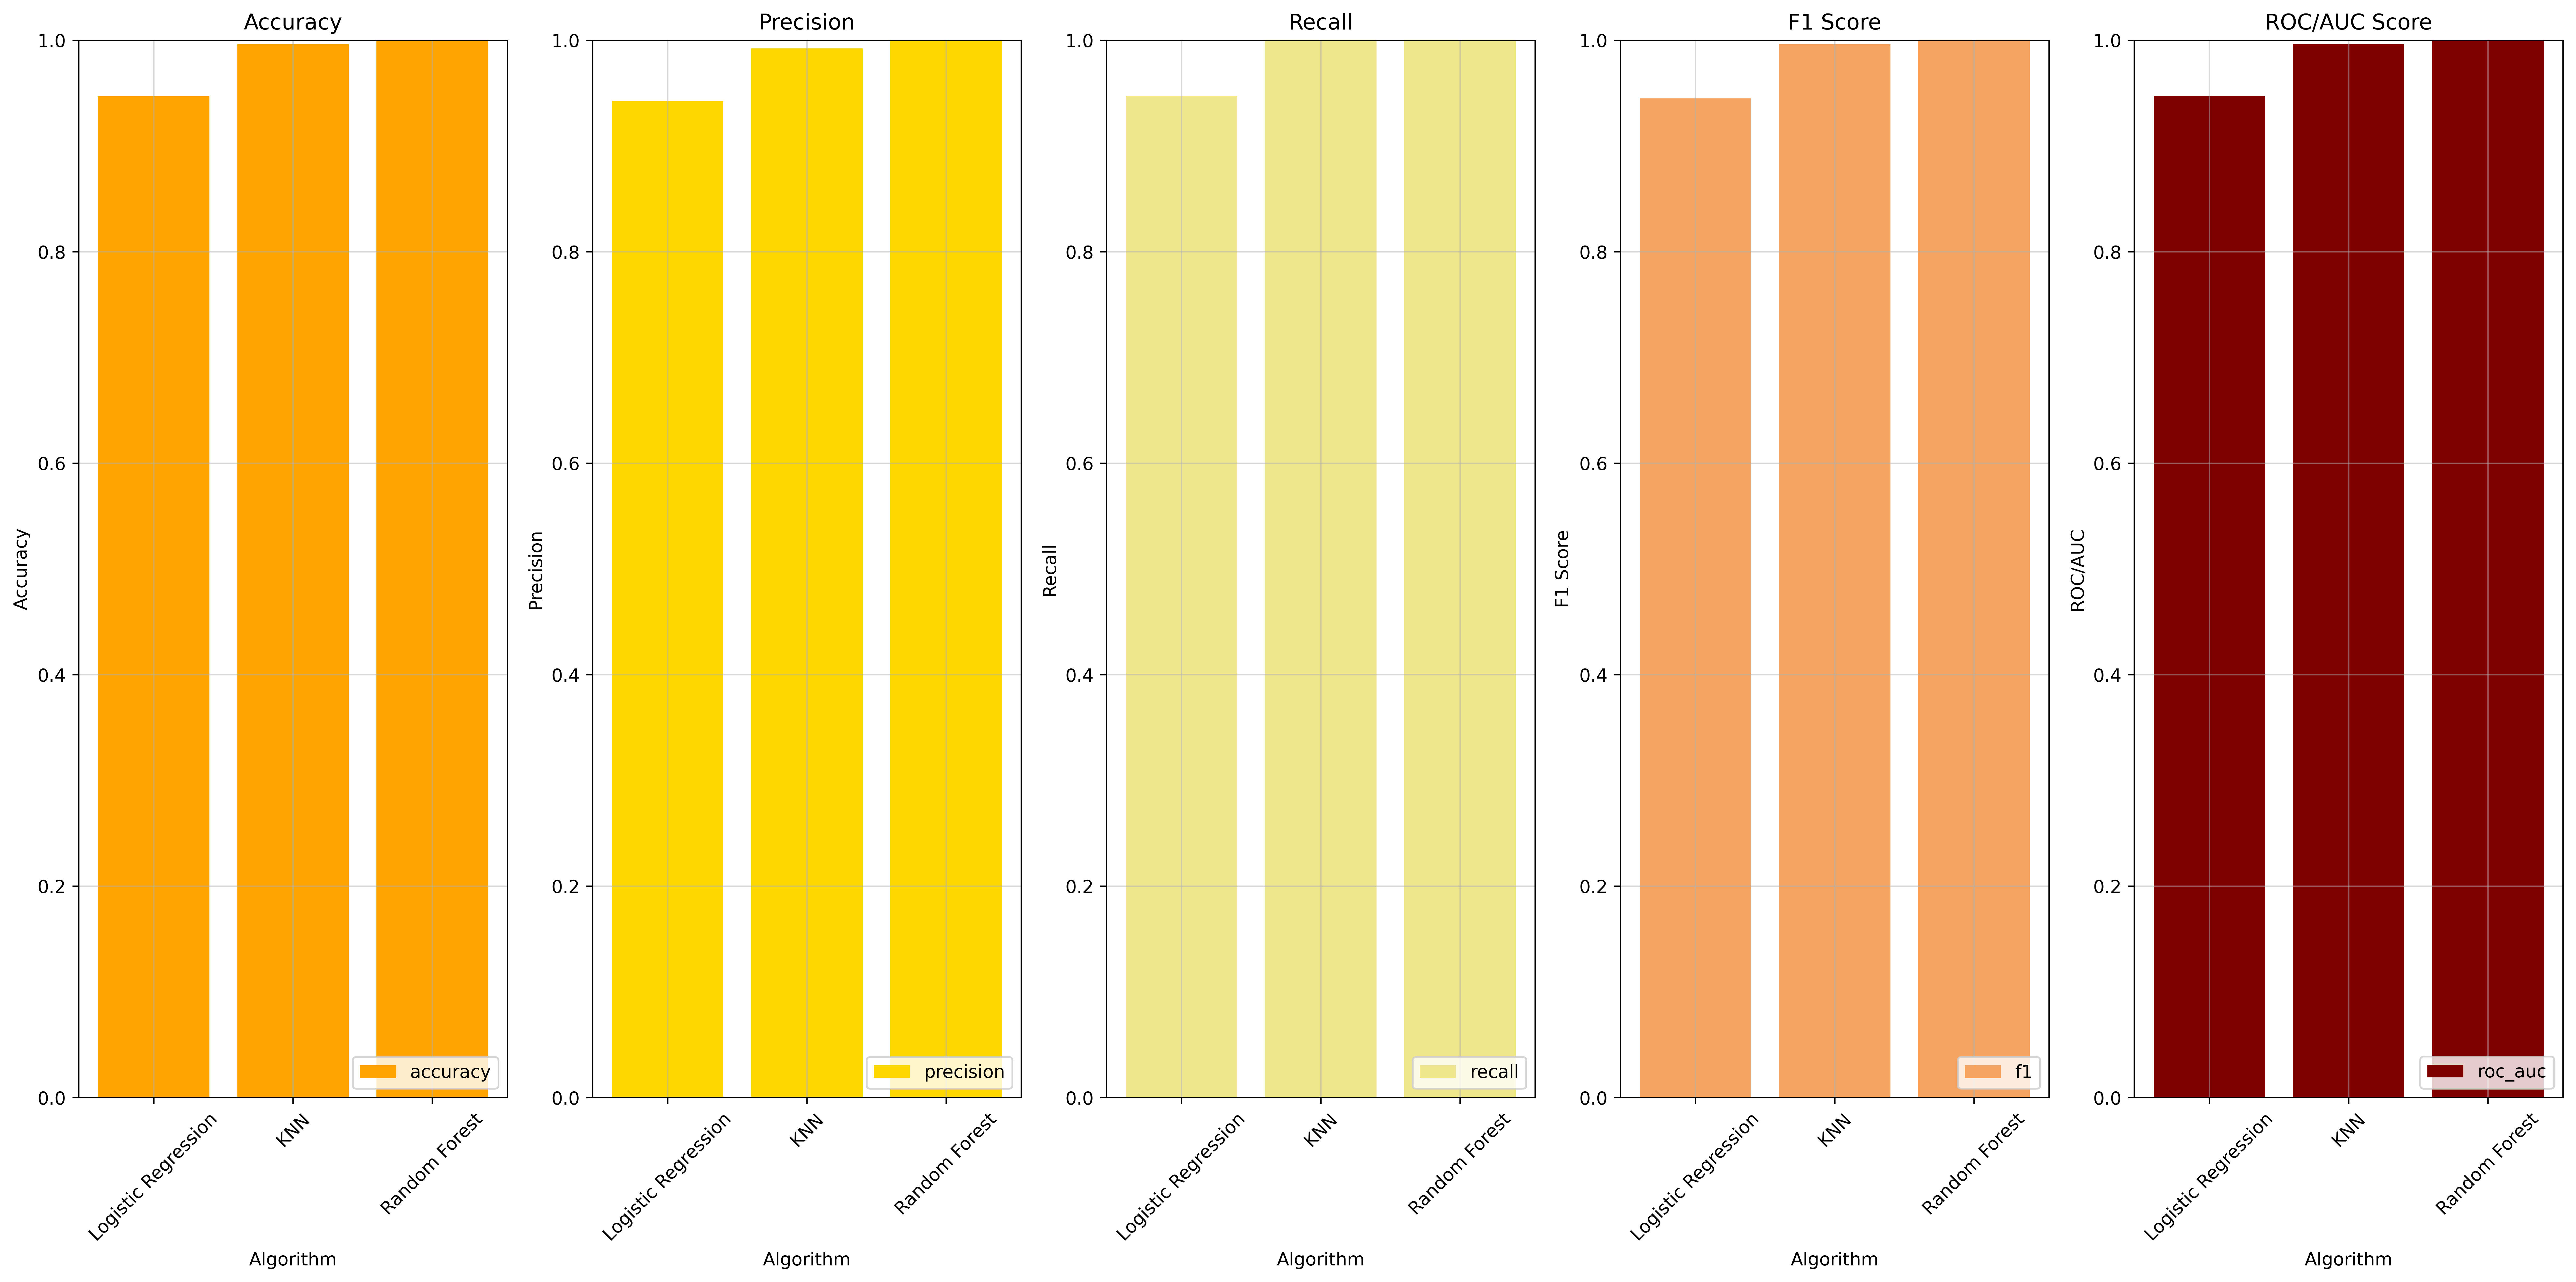

In [165]:
# comparing all metrics

x_labels = performance_metrics['method']
indices = np.arange(len(x_labels))
width = 0.3

fig, ax = plt.subplots(1, 5, sharex=True, sharey=False, figsize=(20, 10), dpi=500)

# Accuracy
ax[0].bar(indices, performance_metrics['accuracy'], color="orange", alpha=1, label="accuracy")
ax[0].grid(True, alpha=0.5)
ax[0].set_ylim(0, 1)
ax[0].set_xlabel("Algorithm")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy")
ax[0].legend(loc='lower right')
ax[0].set_xticks(indices)
ax[0].set_xticklabels(x_labels, rotation=45)

# Precision
ax[1].bar(indices, performance_metrics['precision'], color="gold", alpha=1, label="precision")
ax[1].grid(True, alpha=0.5)
ax[1].set_ylim(0, 1)
ax[1].set_xlabel("Algorithm")
ax[1].set_ylabel("Precision")
ax[1].set_title("Precision")
ax[1].legend(loc='lower right')
ax[1].set_xticks(indices)
ax[1].set_xticklabels(x_labels, rotation=45)

# Recall
ax[2].bar(indices, performance_metrics['recall'], color="khaki", alpha=1, label="recall")
ax[2].grid(True, alpha=0.5)
ax[2].set_ylim(0, 1)
ax[2].set_xlabel("Algorithm")
ax[2].set_ylabel("Recall")
ax[2].set_title("Recall")
ax[2].legend(loc='lower right')
ax[2].set_xticks(indices)
ax[2].set_xticklabels(x_labels, rotation=45)

# F1 Score
ax[3].bar(indices, performance_metrics['f1'], color="sandybrown", alpha=1, label="f1")
ax[3].grid(True, alpha=0.5)
ax[3].set_ylim(0, 1)
ax[3].set_xlabel("Algorithm")
ax[3].set_ylabel("F1 Score")
ax[3].set_title("F1 Score")
ax[3].legend(loc='lower right')
ax[3].set_xticks(indices)
ax[3].set_xticklabels(x_labels, rotation=45)

# ROC/AUC
ax[4].bar(indices, performance_metrics['roc_auc'], color="maroon", alpha=1, label="roc_auc")
ax[4].grid(True, alpha=0.5)
ax[4].set_ylim(0, 1)
ax[4].set_xlabel("Algorithm")
ax[4].set_ylabel("ROC/AUC")
ax[4].set_title("ROC/AUC Score")
ax[4].legend(loc='lower right')
ax[4].set_xticks(indices)
ax[4].set_xticklabels(x_labels, rotation=45)

plt.tight_layout()
plt.show()


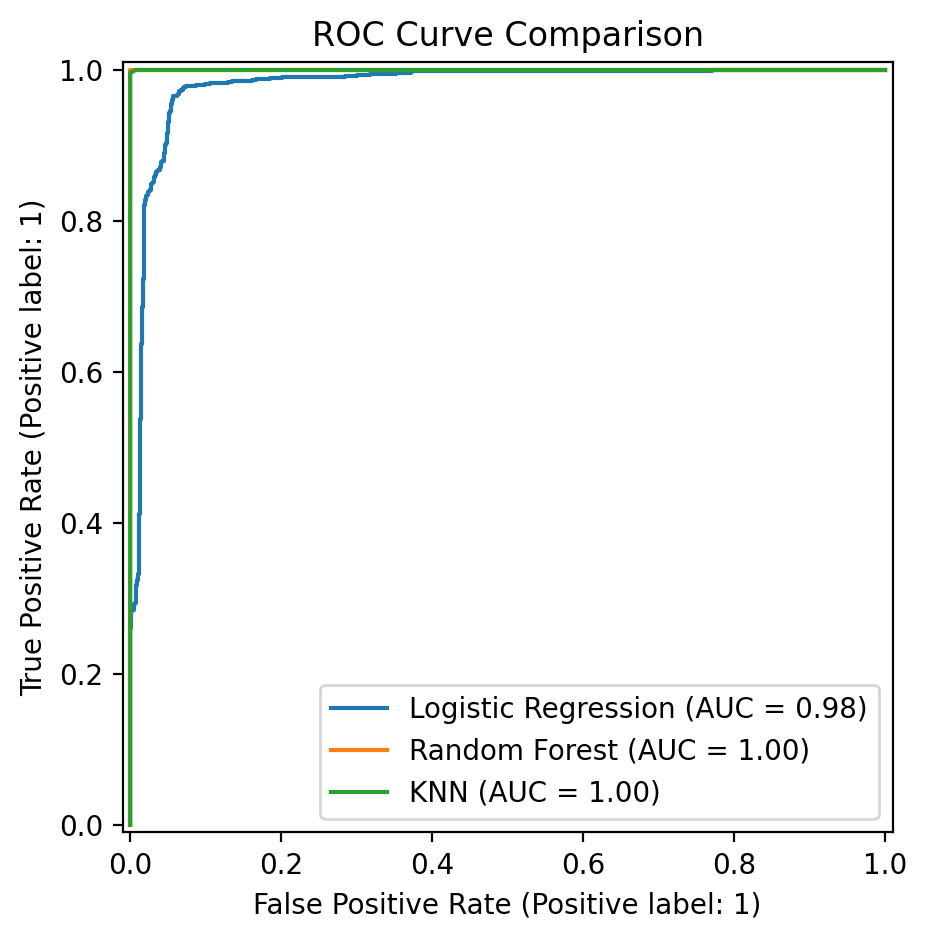

In [166]:
# plotting ROC curves with AUC scores

# Create the figure and axis
fig, ax = plt.subplots(figsize=(5, 5), dpi=200)

# Plot ROC curves for each model
RocCurveDisplay.from_estimator(lr, X_test, y_test, ax=ax, name="Logistic Regression")
RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=ax, name="Random Forest")
RocCurveDisplay.from_estimator(knn, X_test, y_test, ax=ax, name="KNN")

# Add a title
ax.set_title("ROC Curve Comparison")

# Show the plot
plt.show()


- Based on the evaluation metrics, Random Forest classifier seems to overfit the data, and the. Model tuning seems to be necessary to prevent overfitting.